In [38]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from dlp.dataset import Dataset

from utils import IrlDataProcessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Load dataset
ds = Dataset()

home_path = str(Path.home()) + '/GithubRepos'
ds.load(home_path + '/dlp-dataset/data/DJI_0012')

In [31]:
extractor = IrlDataProcessor(ds = ds)

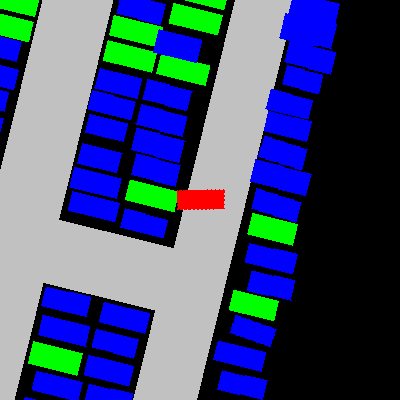

In [32]:
scene = ds.get('scene', ds.list_scenes()[0])
frame = ds.get_future_frames(scene['first_frame'],timesteps=300)[0]
inst_token = frame['instances'][0]

instance = ds.get('instance', inst_token)
current_state = np.array([instance['coords'][0], instance['coords'][1], instance['heading'], instance['speed']])

img_frame = extractor.vis.plot_frame(frame['frame_token'])
img = extractor.vis.inst_centric(img_frame, inst_token)
display(img)

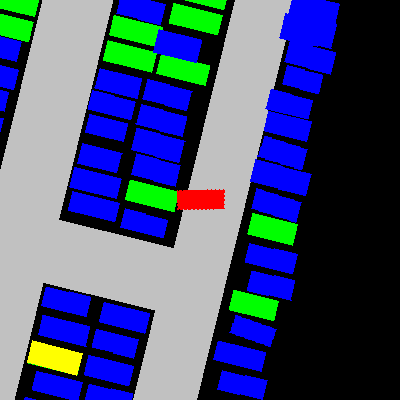

In [89]:
import cv2
import PIL 

def get_spots_from_instance(inst_token):
    img_frame = extractor.vis.plot_frame(frame['frame_token'])
    img = extractor.vis.inst_centric(img_frame, inst_token)
    return extractor.spot_detector.detect(img)

def get_corners(spot):
    return cv2.boxPoints(spot)

def label_spot(spot, instance_view):
    instance_view_copy = instance_view.copy()
    corners = get_corners(sample_spot)
    img_draw = PIL.ImageDraw.Draw(instance_view_copy)  
    img_draw.polygon(corners, fill ="yellow", outline ="yellow")
    return instance_view_copy

labeled_img = label_spot(sample_spot, img)
display(labeled_img)


In [76]:
for sample_spot in extractor.spot_detector.detect(img):
    corners = get_corners(sample_spot)
    #fig, ax = plt.subplots()
    #ax.add_patch(patches.Polygon(corners, linewidth=0, fill=True, color='yellow'))
    #ax.imshow(img)

In [77]:
type(img)



PIL.Image.Image

In [33]:
sample_spot

,id,area,top_left_x,top_left_y,top_right_x,top_right_y,btm_right_x,btm_right_y,btm_left_x,btm_left_y
0,1,A,28.830000,73.43,30.846429,73.43,30.846429,68.81,28.830000,68.81
0,2,A,31.446429,73.43,33.462857,73.43,33.462857,68.81,31.446429,68.81
0,3,A,34.062857,73.43,36.079286,73.43,36.079286,68.81,34.062857,68.81
0,4,A,36.679286,73.43,38.695714,73.43,38.695714,68.81,36.679286,68.81
0,5,A,39.295714,73.43,41.312143,73.43,41.312143,68.81,39.295714,68.81
...,...,...,...,...,...,...,...,...,...,...
0,360,I,125.720000,6.18,127.720000,6.18,127.720000,1.25,125.720000,1.25
0,361,I,128.320000,6.18,130.320000,6.18,130.320000,1.25,128.320000,1.25
0,362,I,130.920000,6.18,132.920000,6.18,132.920000,1.25,130.920000,1.25
0,363,I,133.520000,6.18,135.520000,6.18,135.520000,1.25,133.520000,1.25
